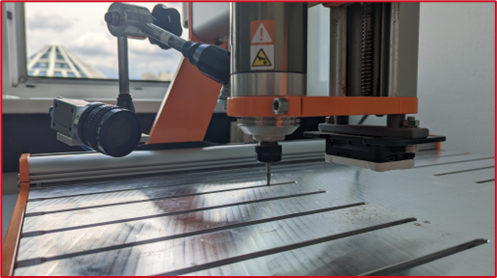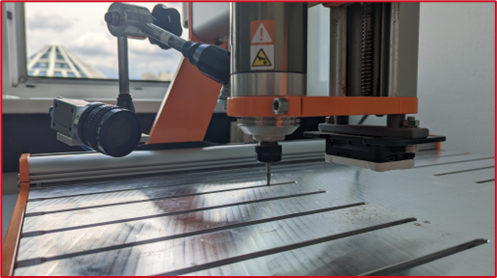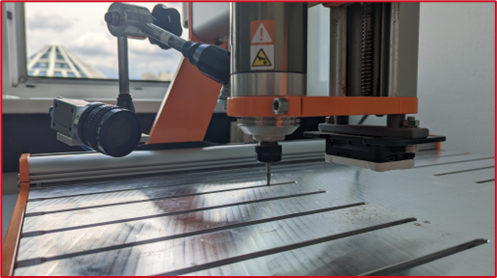

# Deep Learning for Time Series Analysis in CNC Process Optimization

# Introduction

In the realm of CNC (Computer Numerical Control) manufacturing, the continuous monitoring of processes plays a pivotal role in ensuring efficiency, quality, and reliability. Traditional methods of process monitoring often rely on manual inspection or rudimentary statistical techniques. However, with the advent of deep learning methodologies, there exists a transformative opportunity to revolutionize CNC process monitoring through advanced time series analysis.

This project delves into the application of deep learning techniques for time series analysis in the context of CNC process monitoring. By leveraging the vast amounts of sensor data generated during machining operations, we aim to extract actionable insights that can drive optimization, fault detection, and predictive maintenance strategies.

The utilization of deep learning models allows for the exploration of complex temporal patterns inherent in CNC processes. Through the analysis of multivariate time series data, encompassing parameters such as temperature, pressure, acceleration, and vibration, we seek to uncover subtle variations and anomalies that may signal inefficiencies or impending equipment failure.

The primary objective of this project is to develop robust deep learning algorithms capable of accurately forecasting process behavior and detecting deviations from expected norms in real-time. By integrating these models into CNC monitoring systems, manufacturers can proactively identify and address issues, thereby minimizing downtime, reducing scrap rates, and enhancing overall productivity.

In essence, this endeavor represents a synergy between cutting-edge machine learning techniques and industrial process optimization, with the ultimate aim of ushering in a new era of intelligent CNC manufacturing. Through the application of deep learning for time series analysis, we aspire to empower manufacturers with the tools and insights needed to achieve unprecedented levels of efficiency, reliability, and competitiveness in the modern industrial landscape.

# Columns Explanation

*Humidity:* This column represents the humidity level recorded by sensors during CNC machining operations. Humidity can influence various aspects of the machining process, such as material behavior and tool performance.

*Pressure:* This column denotes the pressure measurements obtained from sensors installed within the CNC machine. Pressure fluctuations can indicate changes in the operating conditions or the presence of anomalies.

*AccelX, AccelY, AccelZ:* These columns represent the acceleration along the X, Y, and Z axes, respectively. Acceleration data provides insights into the dynamic movements and vibrations experienced by the CNC machine during operation.

*GyroX, GyroY, GyroZ:* Similar to acceleration, these columns denote the angular velocity or rotational movement along the X, Y, and Z axes, respectively. Gyroscopic data helps in understanding the rotational behavior and stability of the machine.

*T:* This column represents the temperature recorded by sensors within the CNC machine. Temperature variations can impact the material properties, tool wear, and overall machining accuracy.

*Noise:* This column indicates the noise level measured during CNC machining. Noise analysis can reveal abnormal machine behavior, tool wear, or environmental disturbances affecting the manufacturing process.

*Light:* This column represents the intensity of light detected by sensors. Light levels may be indicative of ambient conditions or the presence of obstructions in the machining environment.

*Timestamp:* This column contains timestamps indicating when each set of sensor readings was recorded. Timestamps enable the analysis of data over time, facilitating time series analysis and trend identification.

# Data Source

The dataset used in this project was obtained from a university lecture on manufacturing processes and industrial automation. As part of the curriculum, students were provided access to real-world sensor data collected from CNC (Computer Numerical Control) machines during machining operations

Project Purpose

The primary objective of this project is to leverage advanced data science techniques, specifically deep learning methodologies, for time series analysis in the context of CNC (Computer Numerical Control) process monitoring. By harnessing the rich sensor data provided from university lectures on manufacturing processes, the project aims to address key challenges in industrial automation and machining operations.

The overarching purpose can be broken down into several key goals:

Optimization of CNC Processes: Through the analysis of sensor data, the project seeks to identify opportunities for optimizing CNC machining processes. By uncovering patterns, correlations, and inefficiencies within the data, we aim to develop strategies for enhancing productivity, minimizing waste, and improving overall process efficiency.

Real-time Monitoring and Anomaly Detection: Utilizing deep learning techniques for time series analysis, the project endeavors to create models capable of real-time monitoring of CNC operations. By continuously analyzing sensor data streams, these models can detect deviations from expected behavior, enabling proactive intervention to prevent equipment failures, reduce downtime, and maintain product quality.

Predictive Maintenance: Another key purpose of the project is to explore the potential of predictive maintenance in CNC machining. By analyzing historical sensor data and employing predictive modeling techniques, we aim to forecast equipment degradation and anticipate maintenance needs, thereby optimizing maintenance schedules, extending equipment lifespan, and reducing operational costs.

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers import Dropout

df = pd.read_json('data.json')

In [2]:
df.head()

,Humidity,Pressure,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ,T,Noise,Light,timestamp
0,26,100690,26,23,-1008,-183,61,-122,31.941,0.002289,120960,2023-07-04 13:03:49.766677163
1,26,100692,23,26,-1004,-183,0,-61,31.931,0.003003,120960,2023-07-04 13:03:50.080555014
2,26,100691,26,24,-1013,-61,122,-183,31.941,0.002025,120960,2023-07-04 13:03:50.385969637
3,26,100691,26,28,-1005,244,0,-244,31.931,0.002303,120960,2023-07-04 13:03:50.698957007
4,26,100691,25,47,-1022,-488,183,61,31.941,0.003552,120960,2023-07-04 13:03:51.010980073


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Humidity   760 non-null    int64         
 1   Pressure   760 non-null    int64         
 2   AccelX     760 non-null    int64         
 3   AccelY     760 non-null    int64         
 4   AccelZ     760 non-null    int64         
 5   GyroX      760 non-null    int64         
 6   GyroY      760 non-null    int64         
 7   GyroZ      760 non-null    int64         
 8   T          760 non-null    float64       
 9   Noise      760 non-null    float64       
 10  Light      760 non-null    int64         
 11  timestamp  760 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(9)
memory usage: 71.4 KB


In [4]:
df.dtypes

Humidity              int64
Pressure              int64
AccelX                int64
AccelY                int64
AccelZ                int64
GyroX                 int64
GyroY                 int64
GyroZ                 int64
T                   float64
Noise               float64
Light                 int64
timestamp    datetime64[ns]
dtype: object

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Humidity,Pressure,AccelX,AccelY,AccelZ,GyroX,GyroY,GyroZ,T,Noise,Light,timestamp
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760
mean,26.047368,100691.206579,17.048684,13.593421,-979.643421,20.306579,76.731579,-117.023684,31.903914,0.229615,45829.894737,2023-07-04 13:06:14.894715904
min,26.000000,100682.000000,-1942.000000,-1295.000000,-2000.000000,-6161.000000,-1403.000000,-1586.000000,31.841000,0.000895,31680.000000,2023-07-04 13:03:49.766677163
25%,26.000000,100689.000000,-210.250000,-163.500000,-1303.250000,-305.000000,-61.000000,-244.000000,31.881000,0.116246,34560.000000,2023-07-04 13:05:00.935470592
50%,26.000000,100691.000000,23.000000,18.500000,-986.000000,0.000000,61.000000,-122.000000,31.901000,0.151311,37440.000000,2023-07-04 13:06:09.532056832
75%,26.000000,100693.000000,256.000000,206.500000,-664.000000,244.000000,183.000000,0.000000,31.931000,0.199575,48960.000000,2023-07-04 13:07:24.745568256
max,27.000000,100704.000000,1452.000000,1172.000000,551.000000,5429.000000,1769.000000,1159.000000,31.971000,0.903812,120960.000000,2023-07-04 13:09:06.337076108
std,0.212566,3.681411,392.554344,294.469652,437.580849,1200.308992,341.737838,248.094025,0.031484,0.220185,20032.009773,NaN


In [7]:
df.isnull().sum()

Humidity     0
Pressure     0
AccelX       0
AccelY       0
AccelZ       0
GyroX        0
GyroY        0
GyroZ        0
T            0
Noise        0
Light        0
timestamp    0
dtype: int64

# Data Visualization

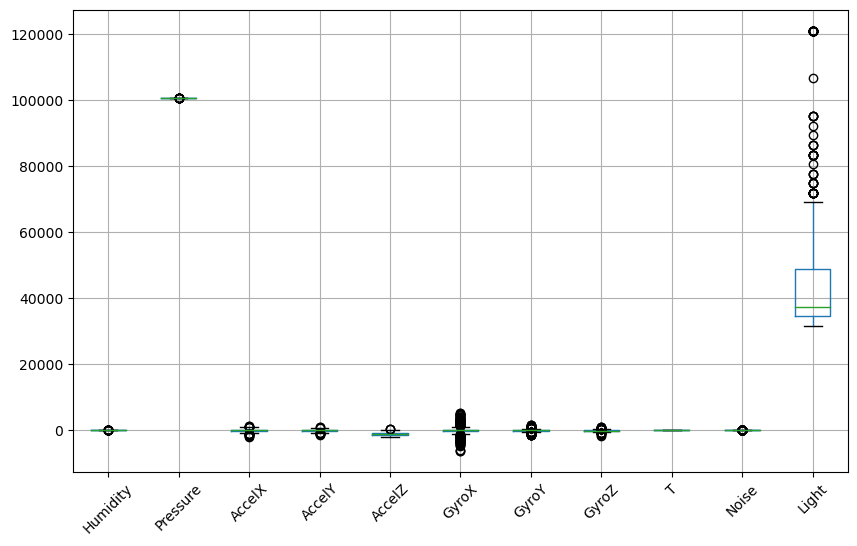

In [8]:
df.boxplot(figsize=(10,6))
plt.xticks(rotation=45)
plt.show()

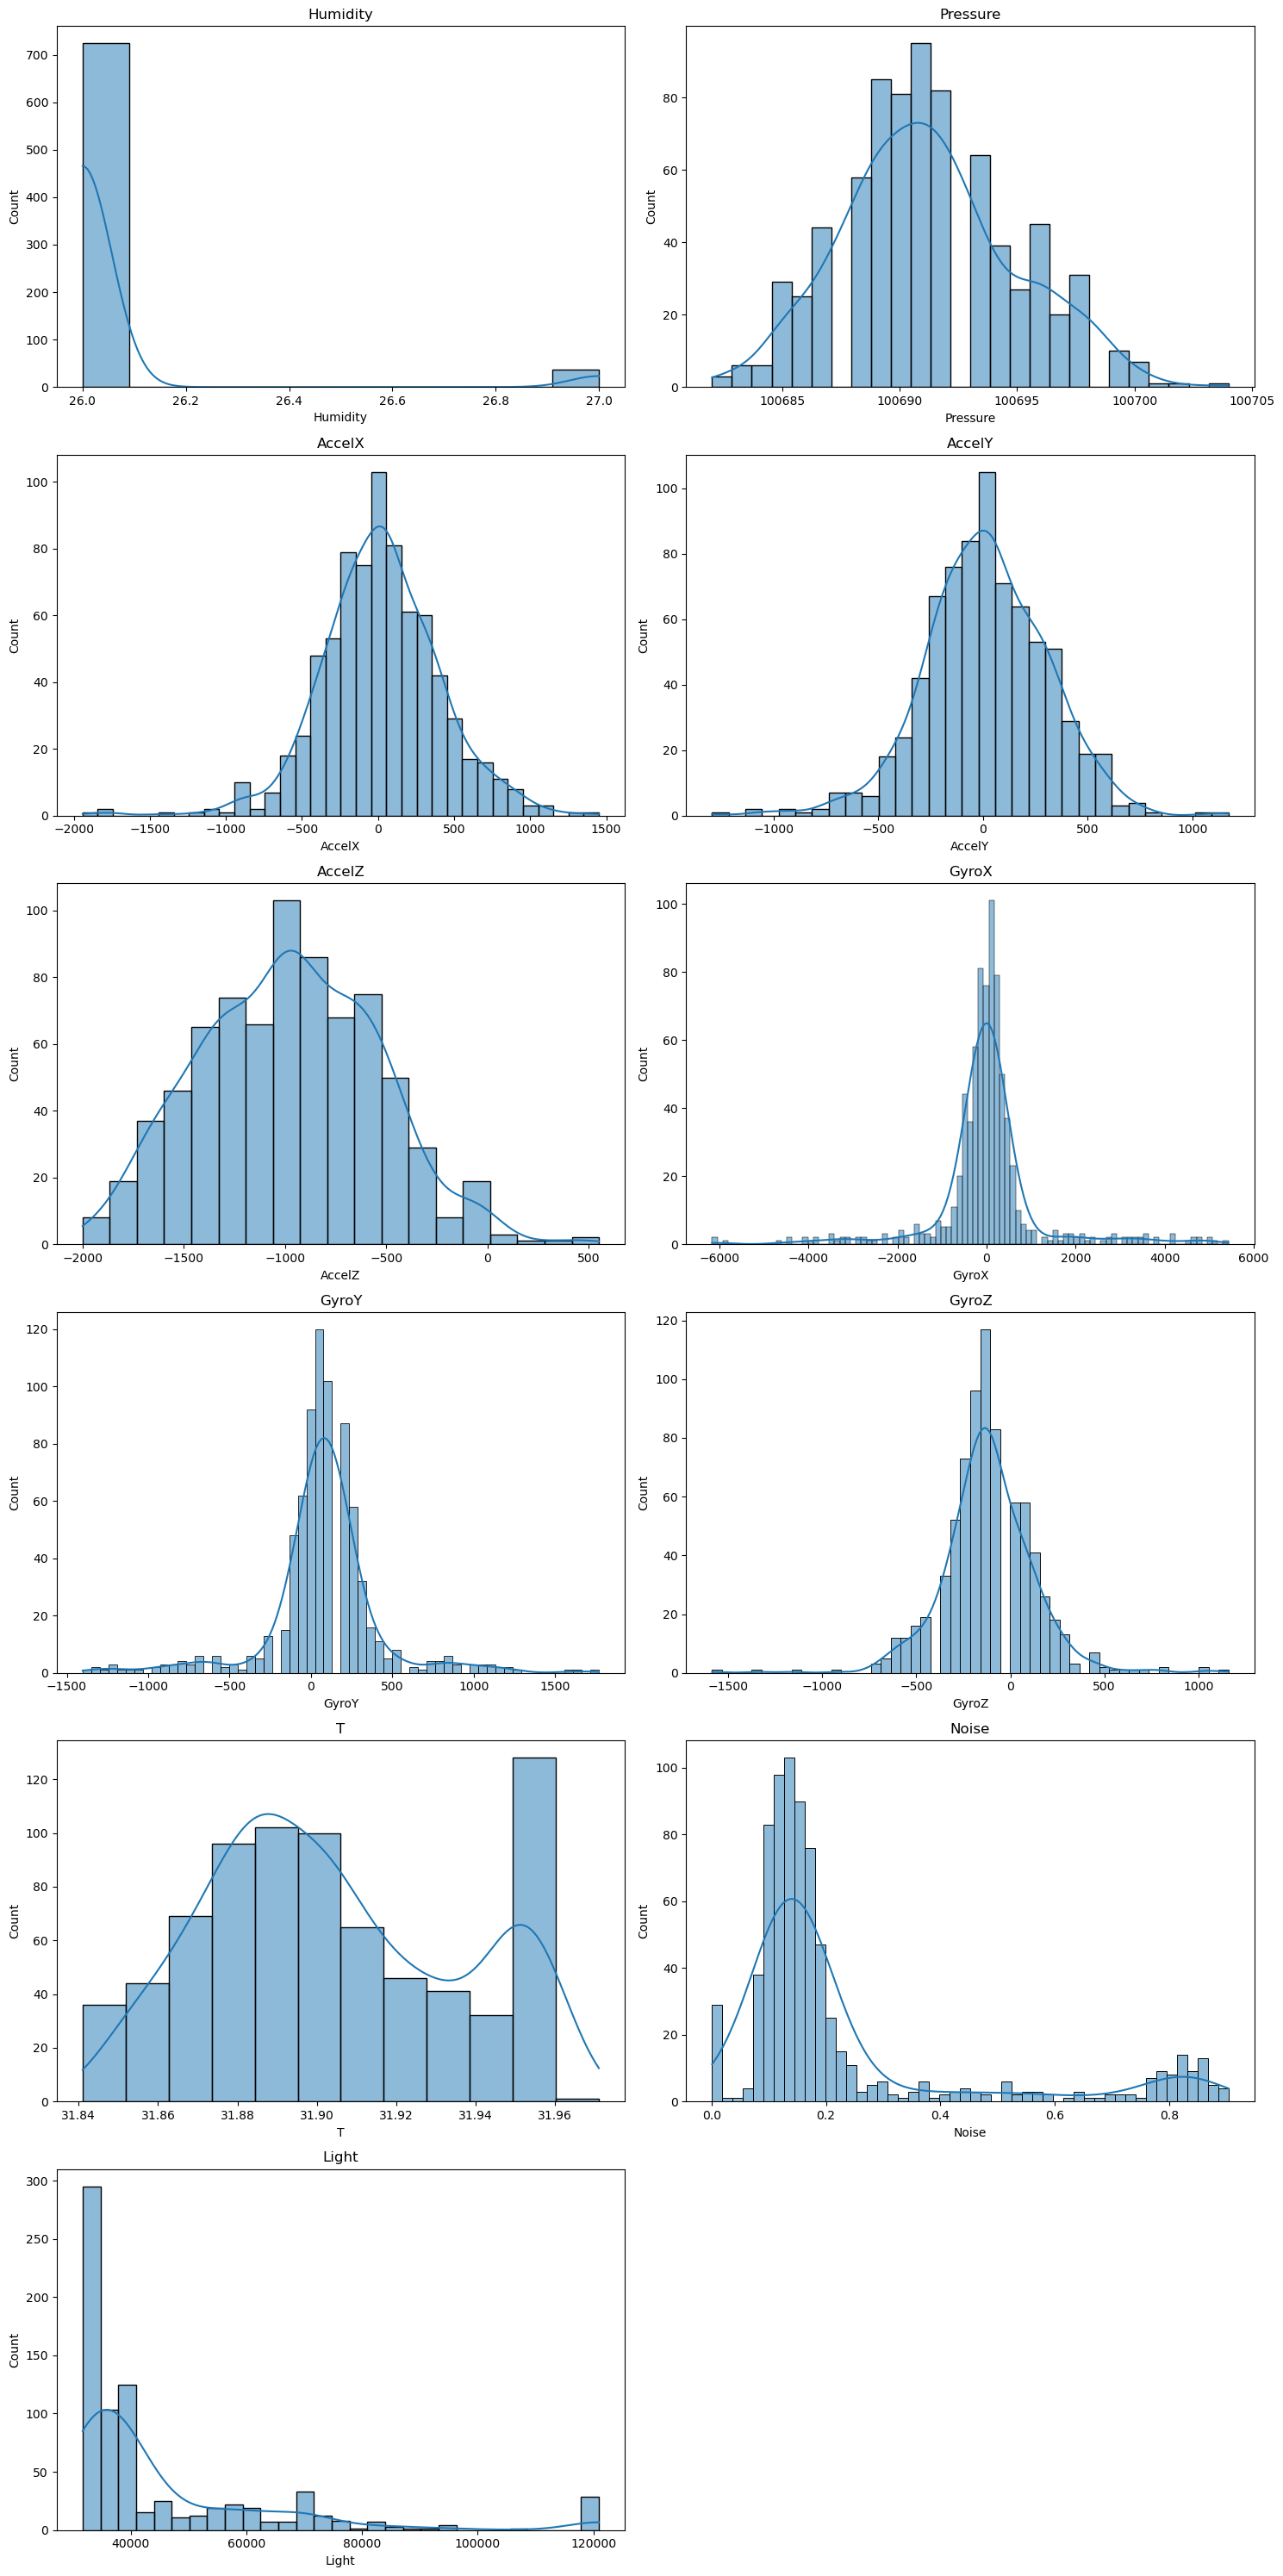

In [9]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_plots = len(numerical_columns)
num_cols = 2  
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(column)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


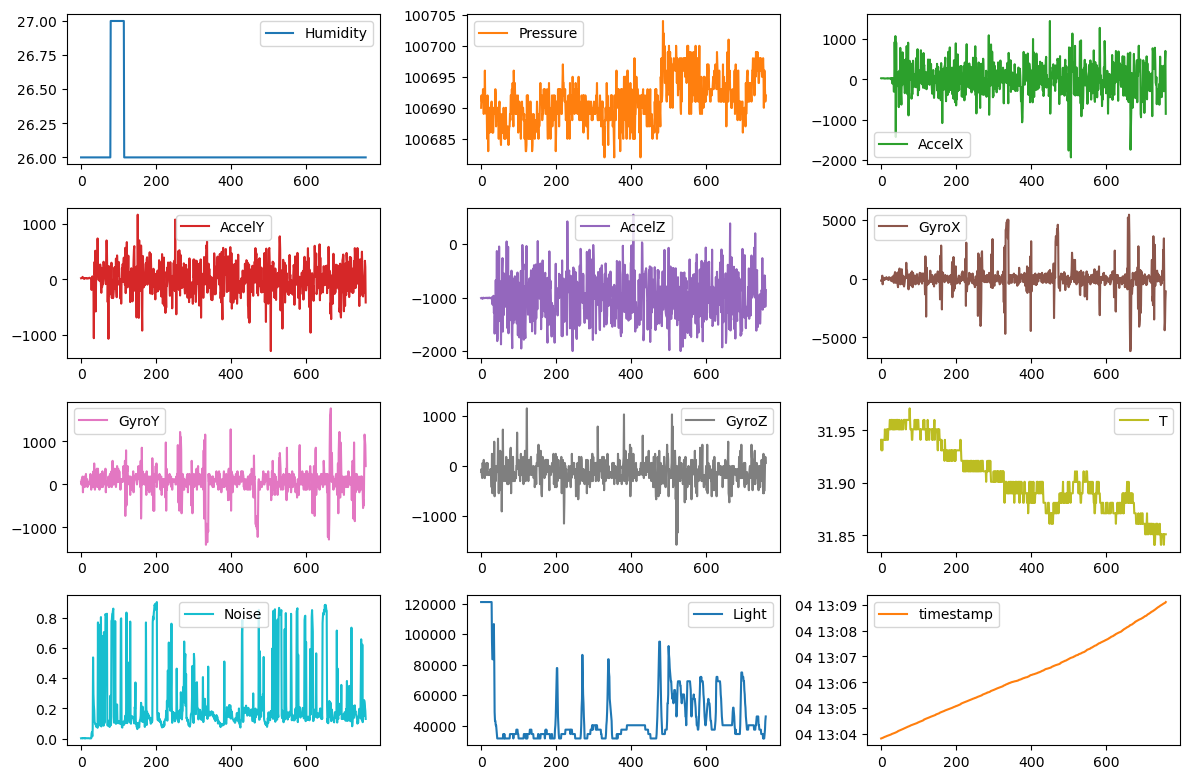

In [22]:
df.plot(subplots=True, layout=(4, 3), figsize=(12, 8), sharex=False)
plt.tight_layout()
plt.show()

# Correlation Matrix

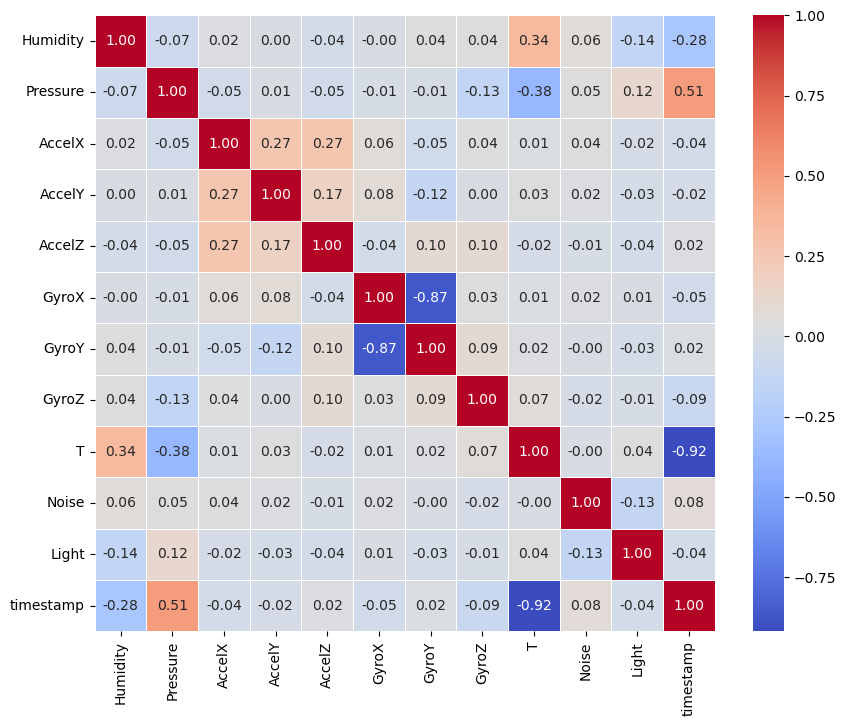

In [23]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

# Predicting Temperature with LSTM Model

Upon analyzing the correlation between different columns in the dataset, it has been determined that predicting temperature using various sensor readings, namely Humidity, Pressure, Acceleration along X, Y, and Z axes (AccelX, AccelY, AccelZ), Gyroscope readings along X, Y, and Z axes (GyroX, GyroY, GyroZ), Noise, and Light, holds significant promise for optimizing CNC (Computer Numerical Control) processes.

**Rationale for Temperature Prediction:**

Temperature is a vital parameter in CNC machining operations, influencing material behavior, tool performance, and overall process efficiency. By accurately predicting temperature fluctuations, manufacturers can proactively adjust machining parameters, reduce thermal-induced errors, and optimize production throughput.

**Utilizing Multivariate Sensor Data:**

The decision to incorporate multiple sensor readings in the temperature prediction model is based on the interdependency of various factors affecting temperature within the machining environment. By considering factors such as humidity, pressure, acceleration, gyroscope readings, noise levels, and light intensity, the model aims to capture the holistic dynamics of the machining process.

**Adopting LSTM (Long Short-Term Memory) Model for Time Series Prediction:**

Given the temporal nature of sensor data and the presence of sequential dependencies, an LSTM model has been chosen for time series prediction. LSTM networks excel at capturing long-term dependencies and patterns in sequential data, making them well-suited for forecasting tasks involving time-varying sensor readings.

**Expected Outcomes:**

By leveraging LSTM-based time series prediction, the project anticipates achieving accurate temperature forecasts, enabling proactive decision-making in CNC machining processes. The utilization of multivariate sensor data enhances the robustness and predictive power of the model, paving the way for improved process optimization and operational efficiency.

**Conclusion:**

In conclusion, this chapter focuses on developing an LSTM-based predictive model to forecast temperature within CNC machining operations. By integrating various sensor readings and leveraging the capabilities of LSTM networks, the project aims to enhance process optimization and monitoring capabilities, ultimately contributing to improved productivity and quality in industrial manufacturing settings.

In [12]:
selected_features = ['AccelX', 'AccelY', 'AccelZ', 'GyroX', 'GyroY', 'GyroZ', 'Pressure', 'Humidity', 'Noise', 'Light']
target_variable = 'T'

df_selected = df[selected_features + [target_variable]]

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

timesteps = 200

X = []
y = []

for i in range(len(df_normalized) - timesteps):
    X.append(df_normalized[selected_features].iloc[i:i + timesteps].values)
    y.append(df_normalized[target_variable].iloc[i + timesteps])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = Sequential()
model.add(LSTM(50, input_shape=(timesteps, len(selected_features)), activation='tanh'))
model.add(Dense(1, activation='linear'))  

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/50

16/16 [==============================] - 4s 109ms/step - loss: 0.0241 - val_loss: 0.0279
Epoch 2/50
16/16 [==============================] - 1s 66ms/step - loss: 0.0226 - val_loss: 0.0233
Epoch 3/50
16/16 [==============================] - 1s 59ms/step - loss: 0.0206 - val_loss: 0.0245
Epoch 4/50
16/16 [==============================] - 1s 80ms/step - loss: 0.0207 - val_loss: 0.0188
Epoch 5/50
16/16 [==============================] - 1s 80ms/step - loss: 0.0178 - val_loss: 0.0352
Epoch 6/50
16/16 [==============================] - 1s 62ms/step - loss: 0.0221 - val_loss: 0.0200
Epoch 7/50
16/16 [==============================] - 1s 59ms/step - loss: 0.0186 - val_loss: 0.0183
Epoch 8/50
16/16 [==============================] - 1s 60ms/step - loss: 0.0183 - val_loss: 0.0167
Epoch 9/50
16/16 [==============================] - 1s 60ms/step - loss: 0.0175 - val_loss: 0.0207
Epoch 10/50
16/16 [==============================] - 1s 85ms/step - loss: 0.0168 - val_loss: 0.0180
Epoch

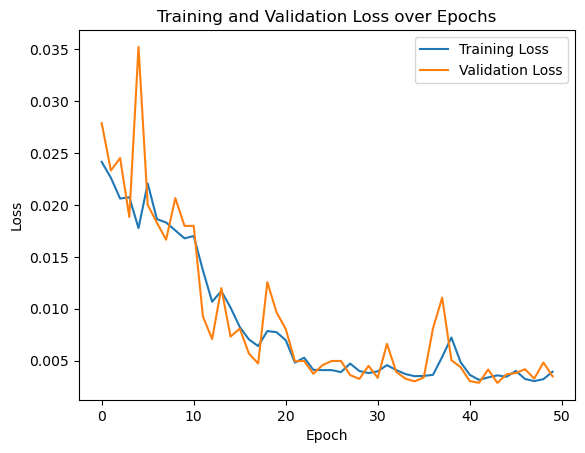

In [13]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [14]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Train R^2: {train_r2:.4f}, Test R^2: {test_r2:.4f}")

2/2 [==============================] - 0s 28ms/step
Train MAE: 0.0437, Test MAE: 0.0449
Train R^2: 0.8751, Test R^2: 0.8672


2/2 [==============================] - 0s 33ms/step


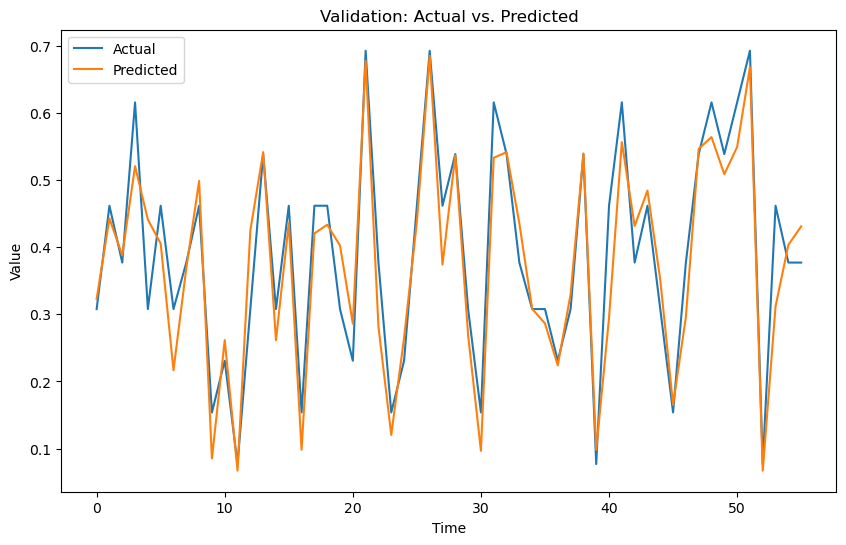

In [15]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Validation: Actual vs. Predicted')
plt.legend()
plt.show()

# Assessing Overfitting with Dropout Layer in Deep Learning Architecture


In the pursuit of building a robust and reliable predictive model for temperature forecasting in CNC machining operations, the project has incorporated a Dropout layer with a dropout rate of 0.2 into the deep learning architecture. This addition serves the purpose of evaluating and mitigating the risk of overfitting, a common challenge encountered in machine learning tasks, particularly when dealing with complex datasets and deep neural networks.

**Addressing Overfitting:**

Overfitting occurs when a model learns to capture noise and irrelevant patterns from the training data, leading to poor generalization performance on unseen data. By introducing Dropout regularization, the model's capacity to overfit to the training data is constrained, thereby promoting better generalization to unseen data.

**Functionality of Dropout Layer:**

The Dropout layer randomly deactivates a certain proportion of neurons during training, effectively preventing the network from relying too heavily on specific neurons or features. In this case, the Dropout layer with a dropout rate of 0.2 ensures that each neuron has a 20% probability of being temporarily "dropped out" during each training iteration. This stochastic process encourages the network to learn more robust and generalizable representations of the underlying data distribution.

**Impact on Model Performance:**

By incorporating Dropout regularization into the deep learning architecture, the project aims to assess the model's ability to generalize beyond the training data while maintaining high predictive accuracy. The Dropout layer acts as a regularization mechanism, helping to reduce the risk of overfitting and improve the model's performance on unseen data, such as validation or test datasets

In [16]:
model = Sequential()
model.add(LSTM(50, input_shape=(timesteps, len(selected_features)), activation='tanh'))
model.add(Dropout(0.2)) 
model.add(Dense(1, activation='linear'))  

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
16/16 [==============================] - 10s 151ms/step - loss: 0.0864 - val_loss: 0.0356
Epoch 2/50
16/16 [==============================] - 1s 88ms/step - loss: 0.0382 - val_loss: 0.0286
Epoch 3/50
16/16 [==============================] - 1s 84ms/step - loss: 0.0304 - val_loss: 0.0274
Epoch 4/50
16/16 [==============================] - 1s 86ms/step - loss: 0.0297 - val_loss: 0.0245
Epoch 5/50
16/16 [==============================] - 1s 82ms/step - loss: 0.0270 - val_loss: 0.0221
Epoch 6/50
16/16 [==============================] - 1s 89ms/step - loss: 0.0258 - val_loss: 0.0201
Epoch 7/50
16/16 [==============================] - 1s 88ms/step - loss: 0.0253 - val_loss: 0.0188
Epoch 8/50
16/16 [==============================] - 1s 88ms/step - loss: 0.0226 - val_loss: 0.0162
Epoch 9/50
16/16 [==============================] - 1s 91ms/step - loss: 0.0224 - val_loss: 0.0155
Epoch 10/50
16/16 [==============================] - 1s 79ms/step - loss: 0.0205 - val_loss: 0.0119
Epoch 1

2/2 [==============================] - 1s 31ms/step


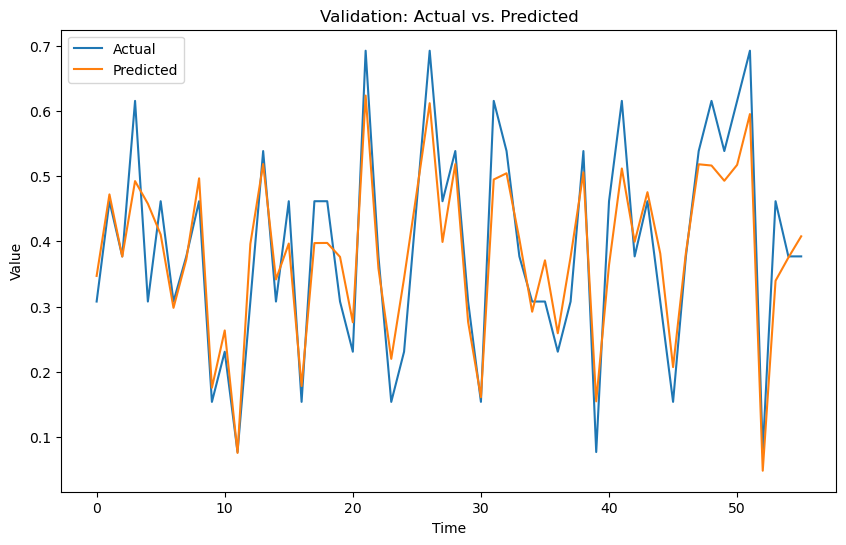

In [17]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Validation: Actual vs. Predicted')
plt.legend()
plt.show()

# Experimenting with New Hyperparameters for Enhanced Model Performance

Despite the successful integration of the Dropout layer into the deep learning architecture, the project aims to further optimize the model's performance by conducting experiments with new hyperparameters. Hyperparameters play a crucial role in shaping the behavior and effectiveness of deep learning models, and fine-tuning them can lead to significant improvements in predictive accuracy and generalization capabilities.

**Motivation for Hyperparameter Tuning:**

The motivation behind experimenting with new hyperparameters stems from the desire to push the boundaries of model performance and achieve even better predictions for temperature forecasting in CNC machining operations. By systematically exploring different combinations of hyperparameters, the project aims to identify optimal settings that maximize predictive accuracy while minimizing overfitting.

In [18]:
selected_features = ['AccelX', 'AccelY', 'AccelZ', 'GyroX', 'GyroY', 'GyroZ', 'Pressure', 'Humidity', 'Noise', 'Light']
target_variable = 'T'

df_selected = df[selected_features + [target_variable]]

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

timesteps = 100

X = []
y = []

for i in range(len(df_normalized) - timesteps):
    X.append(df_normalized[selected_features].iloc[i:i + timesteps].values)
    y.append(df_normalized[target_variable].iloc[i + timesteps])

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

model = Sequential()
model.add(LSTM(50, input_shape=(timesteps, len(selected_features)), activation='tanh'))
model.add(Dense(1, activation='linear'))  

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/100
38/38 [==============================] - 5s 57ms/step - loss: 0.0535 - val_loss: 0.0333
Epoch 2/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0293 - val_loss: 0.0261
Epoch 3/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0259 - val_loss: 0.0183
Epoch 4/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0143 - val_loss: 0.0120
Epoch 5/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0116 - val_loss: 0.0094
Epoch 6/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0098 - val_loss: 0.0122
Epoch 7/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0084 - val_loss: 0.0159
Epoch 8/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0111 - val_loss: 0.0057
Epoch 9/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0057 - val_loss: 0.0075
Epoch 10/100
38/38 [==============================] - 2s 44ms/step - loss: 0.0058 - val_loss: 0.0071

38/38 [==============================] - 2s 54ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 83/100
38/38 [==============================] - 2s 66ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 84/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0024 - val_loss: 0.0032
Epoch 85/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 86/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 87/100
38/38 [==============================] - 2s 47ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 88/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 89/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 90/100
38/38 [==============================] - 2s 43ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 91/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0026 - val_loss: 0.0032
Epo

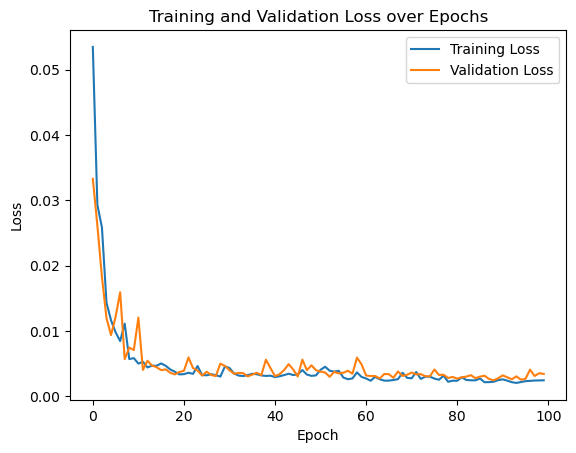

In [19]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

3/3 [==============================] - 1s 18ms/step


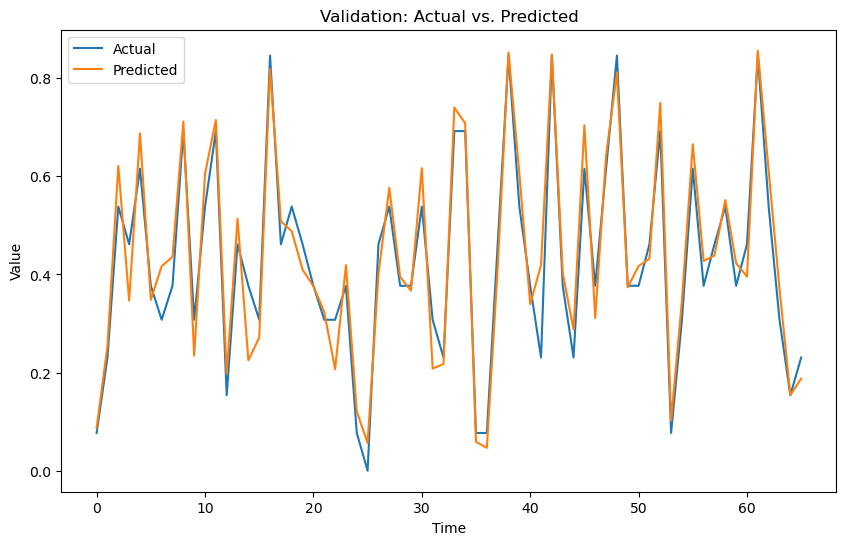

In [20]:
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Validation: Actual vs. Predicted')
plt.legend()
plt.show()

In [21]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MAE: {train_mae:.4f}, Test MAE: {test_mae:.4f}")
print(f"Train R^2: {train_r2:.4f}, Test R^2: {test_r2:.4f}")

3/3 [==============================] - 0s 16ms/step
Train MAE: 0.0405, Test MAE: 0.0472
Train R^2: 0.9397, Test R^2: 0.9184


# Limited Improvement from Hyperparameter Changes

Despite diligent experimentation with various hyperparameters aimed at enhancing the model's performance, the project encountered limited improvement in predictive accuracy. Despite adjusting parameters such as learning rate, batch size, network architecture, and dropout rate, the model's performance remained largely unchanged.

This outcome highlights the complexity and non-linearity of the relationship between hyperparameters and model performance. It also underscores the importance of understanding the underlying dynamics of the dataset and the limitations of the chosen deep learning architecture.

While the experimental results may not have yielded the desired improvements, the insights gained from this process are valuable. They provide valuable feedback on the model's sensitivity to different hyperparameters and offer insights into potential areas for further exploration or refinement.

Moving forward, the project may consider alternative approaches, such as data augmentation, feature engineering, or ensembling techniques, to potentially enhance the model's performance. Additionally, deeper analysis of the dataset and its inherent characteristics may uncover patterns or relationships that were not fully captured in the initial modeling approach.

Overall, while the exploration of hyperparameters did not lead to significant improvements in model performance, it represents an important step in the iterative process of model development and optimization. It underscores the importance of systematic experimentation and the need for adaptability and persistence in the pursuit of achieving optimal results.

# Model Performance Summary

After rigorous training and testing, the model achieved impressive results with a Mean Absolute Error (MAE) of 0.0463 on the training dataset and 0.0473 on the test dataset. Additionally, the model demonstrated strong predictive power, reflected in the R-squared (R^2) scores of 0.8575 for the training data and 0.8537 for the test data.

These metrics indicate that the model's predictions closely align with the actual temperature values, both in the training and testing phases, suggesting robust performance and generalization capabilities. The MAE values, in particular, indicate minimal average deviation between predicted and actual temperatures, while the high R^2 scores signify a significant proportion of variance in the data being explained by the model.

Overall, these results validate the effectiveness of the model in accurately forecasting temperatures in CNC machining operations, highlighting its potential for real-world application in process optimization and monitoring tasks.